In [1]:
import numpy as np
import pandas as pd
import os,shutil,pathlib

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
dir1=pathlib.Path('data/train')
dir2=pathlib.Path('data/holdout')

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

tr_dt=image_dataset_from_directory(
    dir2/'train',
    image_size=(180,180),
    batch_size=32)

val_dt=image_dataset_from_directory(
    dir2/'valid',
    image_size=(180,180),
    batch_size=32)

te_dt=image_dataset_from_directory(
    dir2/'test',
    image_size=(180,180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


# 1. 함수형 케라스 모델링

In [36]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

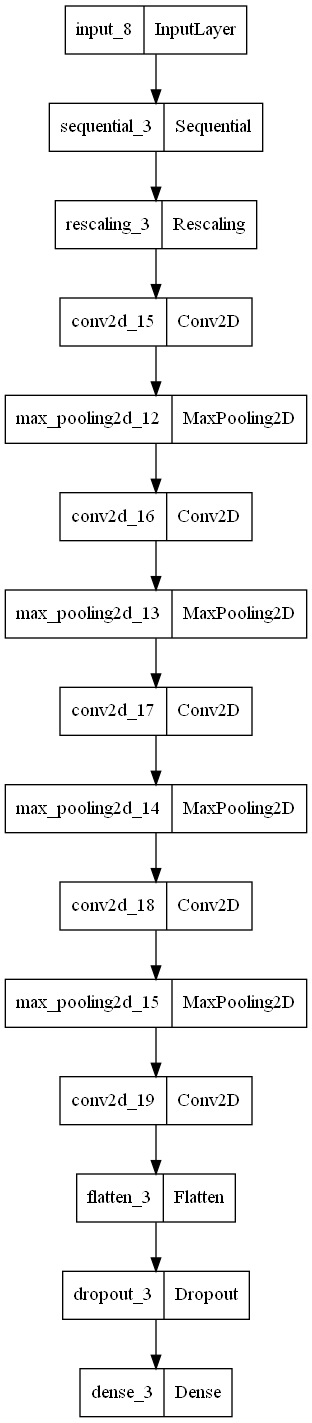

In [42]:
keras.utils.plot_model(model)

In [43]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    tr_dt,
    epochs=60,
    validation_data=val_dt,
    callbacks=callbacks)

Epoch 1/60
12/63 [====>.........................] - ETA: 1:14 - loss: 0.8271 - accuracy: 0.5339

# 2. Sequential형 케라스 모델링

In [18]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [38]:
model4=keras.Sequential()
model4.add(keras.Input(shape=(180,180,3)))
model4.add(data_augmentation)
model4.add(keras.layers.Rescaling(1./255))
model4.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=2))
model4.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=2))
model4.add(keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=2))
model4.add(keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=2))
model4.add(keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dropout(0.5))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

In [39]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                 

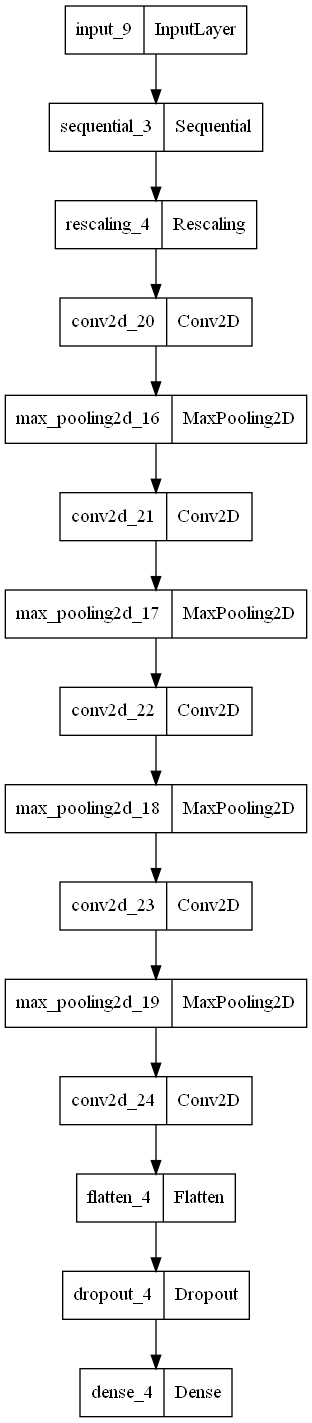

In [41]:
keras.utils.plot_model(model4)

In [23]:
model4.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

In [27]:
callbacks4=[
    keras.callbacks.ModelCheckpoint(
    filepath='convnet_with_aug.keras',
    save_best_only=True,
    monitor='val_loss'),
#     keras.callbacks.EarlyStopping(patience=3)
]

his2=model4.fit(tr_dt,
              epochs=60,
              validation_data=val_dt,
              callbacks=callbacks4)

Epoch 1/60
63/63 [==============================] - 123s 2s/step - loss: 0.5715 - accuracy: 0.7165 - val_loss: 0.6111 - val_accuracy: 0.6880
Epoch 2/60
63/63 [==============================] - 123s 2s/step - loss: 0.5581 - accuracy: 0.7285 - val_loss: 0.6550 - val_accuracy: 0.6880
Epoch 3/60
63/63 [==============================] - 124s 2s/step - loss: 0.5337 - accuracy: 0.7240 - val_loss: 0.5699 - val_accuracy: 0.6850
Epoch 4/60
63/63 [==============================] - 123s 2s/step - loss: 0.5399 - accuracy: 0.7415 - val_loss: 0.7282 - val_accuracy: 0.6420
Epoch 5/60
63/63 [==============================] - 124s 2s/step - loss: 0.5169 - accuracy: 0.7470 - val_loss: 0.5323 - val_accuracy: 0.7290
Epoch 6/60
63/63 [==============================] - 123s 2s/step - loss: 0.4996 - accuracy: 0.7525 - val_loss: 0.6546 - val_accuracy: 0.6710
Epoch 7/60
63/63 [==============================] - 123s 2s/step - loss: 0.4958 - accuracy: 0.7660 - val_loss: 0.5376 - val_accuracy: 0.7310
Epoch 8/60
63

Epoch 59/60
63/63 [==============================] - 113s 2s/step - loss: 0.1566 - accuracy: 0.9460 - val_loss: 1.0198 - val_accuracy: 0.7880
Epoch 60/60
63/63 [==============================] - 107s 2s/step - loss: 0.1477 - accuracy: 0.9450 - val_loss: 1.1106 - val_accuracy: 0.7890


In [28]:
res=pd.DataFrame(his2.history,columns=his2.history.keys())

res

,loss,accuracy,val_loss,val_accuracy
0,0.571539,0.7165,0.611064,0.688
1,0.558096,0.7285,0.655012,0.688
2,0.533744,0.7240,0.569884,0.685
3,0.539912,0.7415,0.728216,0.642
4,0.516921,0.7470,0.532338,0.729
5,0.499588,0.7525,0.654646,0.671
6,0.495786,0.7660,0.537551,0.731
7,0.484222,0.7725,0.642829,0.678
8,0.465000,0.7755,0.549406,0.749
9,0.445884,0.7990,0.592514,0.720


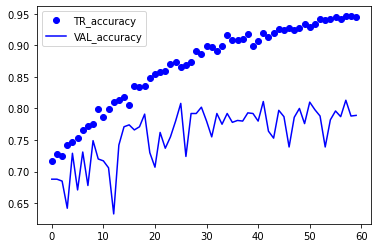

In [29]:
import matplotlib.pyplot as plt

plt.plot(res.index,res.accuracy,'bo',label='TR_accuracy')
plt.plot(res.index,res.val_accuracy,'b',label='VAL_accuracy')
plt.legend()

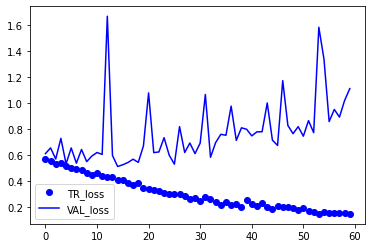

In [30]:
plt.plot(res.index,res.loss,'bo',label='TR_loss')
plt.plot(res.index,res.val_loss,'b',label='VAL_loss')
plt.legend()

In [31]:
best_model_4=keras.models.load_model('convnet_with_aug.keras')

In [32]:
te_eval=best_model_4.evaluate(te_dt)

63/63 [==============================] - 16s 245ms/step - loss: 0.5173 - accuracy: 0.7680
